# Data mining \& clustering

The goal if this practical is to adress the folowing problem: 


 Given XXX raw, unlabeled documents, ... How to exploit/understand/represent them?

In the previous week, we have seen how to represent textual data with the Bag of Words (BoW) model:
$$X = 
	\begin{matrix} 
	 & \textbf{t}_j \\
	 & \downarrow \\
	\textbf{d}_i \rightarrow &
	\begin{pmatrix} 
	x_{1,1} & \dots & x_{1,d} \\
	\vdots & \ddots & \vdots \\
	x_{N,1} & \dots & x_{N,d} \\
	\end{pmatrix}
	\end{matrix}
	$$

From this BoW representation, we want to answer the following questions:
1. Which clustering algorithm to choose?
    - K-means, LSA, pLSA, LDA
1. What results to expect?
    - Semantics, noise cleaning, etc...
1. Which qualitative and quantitative analyses to understand the groups?
[comment]: <> (%1. Comment boucler, itérer pour améliorer la qualité du processus?)


<span style="color:magenta" > In this practical, we use a **labeled dataset** in order to evaluate performances with quantitative and well-defined metrics. </span>


In [26]:
import numpy as np
import matplotlib.pyplot as plt

import codecs
import re
import os.path
import sklearn

## Data loading



In [2]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

In [3]:
# conversion BoW + tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer() 
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')

vectors = vectorizer.fit_transform(newsgroups_train.data)
print(vectors.shape)

# sparsity measure = 44 active words over 1000 per document (157 over 130000) !!
print(vectors.nnz / float(vectors.shape[0]))

(11314, 1000)
44.164928407283014


In [4]:
# retrieve words
print([(i,vectorizer.get_feature_names_out()[i]) \
       for i in np.random.randint(vectors.shape[1], size=10)])

[(168, 'board'), (207, 'chance'), (675, 'paul'), (316, 'difficult'), (451, 'harvard'), (217, 'chris'), (977, 'windows'), (953, 'view'), (10, '11'), (219, 'christian')]


In [5]:
# labels (only for evaluation)
Y = newsgroups_train.target
print(Y[:10]) 
print([newsgroups_train.target_names[i] for i in Y[:20]]) # vraie classe

[ 7  4  4  1 14 16 13  3  2  4]
['rec.autos', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.graphics', 'sci.space', 'talk.politics.guns', 'sci.med', 'comp.sys.ibm.pc.hardware', 'comp.os.ms-windows.misc', 'comp.sys.mac.hardware', 'rec.motorcycles', 'talk.religion.misc', 'comp.sys.mac.hardware', 'sci.space', 'misc.forsale', 'alt.atheism', 'comp.graphics', 'rec.autos', 'sci.electronics', 'comp.windows.x']


# 0) Word clouds 
### Drawing word clouds from the raw corpus or words' frequencies :  [make word clouds !](https://github.com/amueller/word_cloud)

### Installation
If you are using pip:

`pip install wordcloud`

### If you are using conda, you can install from the conda-forge channel:

`conda install -c conda-forge wordcloud`

### Let's look at the most frequent words in this dataset

In [9]:
data = np.array(newsgroups_train.data)
corpus = "".join(data)
words = corpus.split() # optional args to choose the splitting chars
print("Nombre de mots=",len(words))
# Lets find the most frequence words Your code here

Nombre de mots= 3252437


In [15]:
import collections

words = corpus.split()
words_counter = collections.Counter(words)
top_100_words = words_counter.most_common(100)
top_100_words

[('the', 127670),
 ('to', 69836),
 ('of', 66705),
 ('a', 56148),
 ('and', 52580),
 ('is', 39554),
 ('in', 37787),
 ('I', 37616),
 ('that', 34582),
 ('>', 27843),
 ('for', 25707),
 ('you', 19874),
 ('it', 19698),
 ('be', 18364),
 ('on', 18201),
 ('have', 17292),
 ('are', 17260),
 ('with', 16179),
 ('not', 15434),
 ('The', 14079),
 ('this', 13611),
 ('as', 13373),
 ('or', 12497),
 ('was', 12426),
 ('Subject:', 11642),
 ('From:', 11536),
 ('Lines:', 11328),
 ('Organization:', 10881),
 ('by', 10279),
 ('but', 10265),
 ('|', 10072),
 ('from', 9859),
 ('at', 9807),
 ('-', 9662),
 ('they', 9591),
 ('an', 9393),
 ('will', 8584),
 ('can', 8493),
 ('would', 8381),
 ('In', 7904),
 ('if', 7792),
 ('about', 7768),
 ('Re:', 7747),
 ('my', 7679),
 ('--', 7639),
 ('writes:', 7505),
 ('your', 6972),
 ('has', 6969),
 ('do', 6930),
 ('all', 6745),
 ('one', 6576),
 ('|>', 6521),
 ('article', 6402),
 ('what', 6183),
 ('we', 6047),
 ('there', 5798),
 ('any', 5759),
 ('who', 5734),
 ('some', 5682),
 ('he', 5

### Plot the N frequent words and verify that its follows a Zipf law

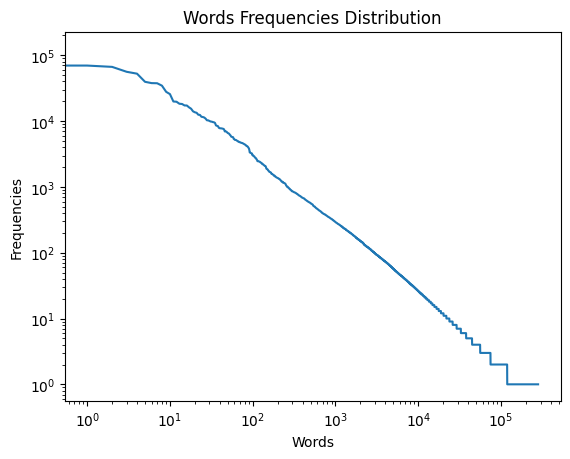

In [17]:
dic = dict(words_counter)
keys = list(dic.keys())
values = np.array(list(dic.values()))
sort = -np.sort(-values)
argsort = np.argsort(-values)

# plot
plt.title('Words Frequencies Distribution')
plt.loglog(np.arange(len(keys)), sort)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.show()

<font color='bleu'>On peut voir que la distribution des fréquences des mots suit la loi de Zipf<font>

### Experiment word clouds

(-0.5, 399.5, 199.5, -0.5)

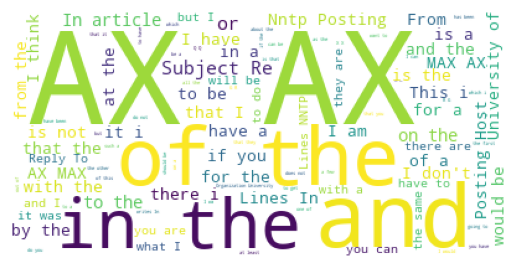

In [25]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(background_color='white', stopwords = [], max_words=100).generate(corpus)            

plt.figure()
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

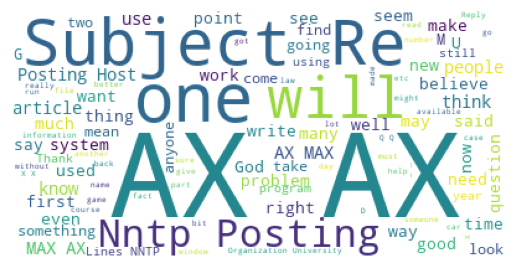

In [28]:
wordcloud = WordCloud(background_color='white', stopwords = STOPWORDS, max_words=100).generate(corpus) 

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")

### Use word clouds with generate\_from\_frequencies. 
N.B.: retrieve the most words frequencies using a CountVectorizer

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

couintvec = CountVectorizer()
X = couintvec.fit_transform(data)

In [35]:
sum_0 = X.sum(0)
words_freq = [(word, sum_0[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq = dict(words_freq)

(-0.5, 399.5, 199.5, -0.5)

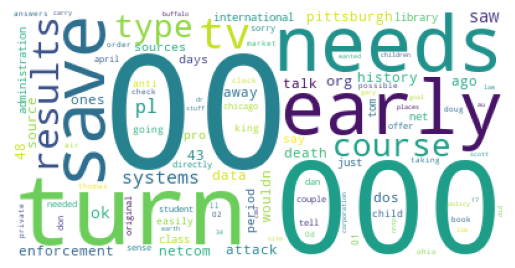

In [36]:
wordcloud = WordCloud(background_color='white', stopwords = STOPWORDS, max_words=100).generate_from_frequencies(words_freq) 

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")

### Drawing word clouds from classes


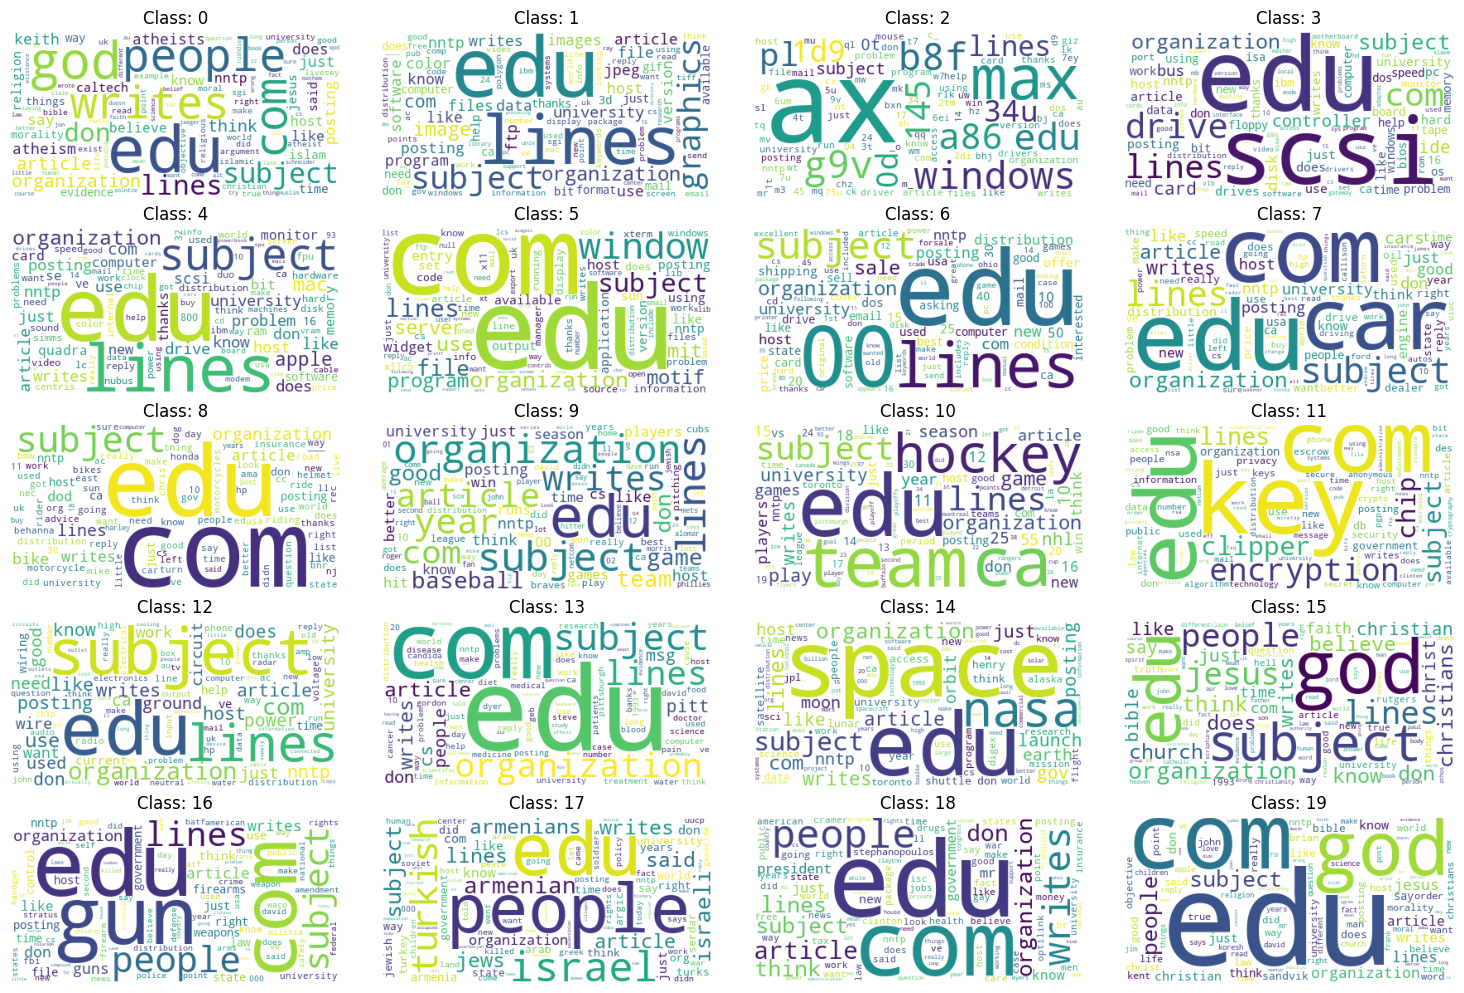

In [42]:
import pandas as pd
y = newsgroups_train.target
unique_classes = np.unique(y)

fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(15, 10))
ax = ax.flatten()

for i, class_name in enumerate(unique_classes):
    class_idx = np.nonzero(y == class_name)[0]  # Corrected indexing
    vectorizer_cv = CountVectorizer(stop_words="english")
    tmp = vectorizer_cv.fit_transform(data[class_idx])
    freq_dict = pd.Series(np.array(tmp.sum(axis=0))[0], index=sorted(vectorizer_cv.vocabulary_))
    wordcloud = WordCloud(
        background_color='white',
        stopwords=STOPWORDS,
        max_words=100).generate_from_frequencies(frequencies=freq_dict)
    ax[i].imshow(wordcloud)
    ax[i].axis("off")
    ax[i].set_title(f"Class: {class_name}")

plt.tight_layout()
plt.show()

# 1) Clustering algorithm: K-Means

**Let's start by the most famous and simple unsupervised algorithm: $k$-means!**
Look at [sklear documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
and apply it to your BoW matrix.


In [44]:
from sklearn.cluster import KMeans
# your code here
kmeans = KMeans(n_clusters=20, random_state=0, max_iter=10).fit(vectors)
# Getting clusters:
kmeans.cluster_centers_

array([[0.10756056, 0.02727664, 0.01102787, ..., 0.00212592, 0.00593682,
        0.00501284],
       [0.00523323, 0.01669429, 0.00168778, ..., 0.00636396, 0.00279291,
        0.0026637 ],
       [0.00212163, 0.00200874, 0.00086759, ..., 0.00221913, 0.00042353,
        0.        ],
       ...,
       [0.00234538, 0.00195804, 0.00063837, ..., 0.0051056 , 0.00321528,
        0.00236145],
       [0.00252404, 0.00392048, 0.002013  , ..., 0.00594924, 0.00468899,
        0.00315283],
       [0.00374857, 0.00500582, 0.00028979, ..., 0.00708021, 0.01223925,
        0.01180756]])

### Clustering Analysis: 
1. **Qualtitative:**
    - Look at the most important words for each cluster
    - Perform cluster assignement to each document, and compute word cloud on the document (raw text or frequencies)
2. **Quantitative:**
    - Compute cluster "purity": $p_j= |y^*_j|$, where $y^*_j$ is the most frequent (GT) label in cluster $C_j$ $\Rightarrow$ $p = \frac{1}{N}\sum\limits_j  p_j$
    - Compute [Rand Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.rand_score.html) and [Adjusted Rand Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score) 

In [49]:
# Look at the most important words for each cluster
most_important_word_index = np.abs(kmeans.cluster_centers_).argmax(1)
most_important_word_index

array([787, 192, 336, 924, 519, 427, 687, 632, 679, 923, 622, 977, 104,
       185, 346, 193, 655, 346, 241, 883], dtype=int64)

In [46]:
for cl, i in enumerate(most_important_word_index):
    print(cl, ':', vectorizer.get_feature_names_out()[i])

0 : sale
1 : car
2 : drive
3 : uk
4 : key
5 : god
6 : pitt
7 : netcom
8 : people
9 : uiuc
10 : nasa
11 : windows
12 : andrew
13 : ca
14 : edu
15 : card
16 : ohio
17 : edu
18 : com
19 : team


In [48]:
# Perform cluster assignement to each document, and compute word cloud on the document (raw text or frequencies)
Y_pred = kmeans.predict(vectors)
print(Y_pred[:10])
print(np.unique(Y_pred))

[ 1 17 14 18 14 18 17  2 11  9]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


# 2) Latent Semantic Analysis (LSA <=> SVD) 


**Remember the LSA factorziation**: 
$$ 
\begin{matrix} 
 & X  &\!\!\!\!\!=\!\!\!\!\!& U  & \Sigma & V^T \\
  & \textbf{t}_j   &  & \hat{ \textbf{d}_i} & &  \\
 & \downarrow  &  &\downarrow  & & \\
\textbf{d}_i \rightarrow 
&
\begin{pmatrix} 
x_{1,1} & \dots & x_{1,d} \\
\\
\vdots & \ddots & \vdots \\
\\
x_{N,1} & \dots & x_{N,d} \\
\end{pmatrix}
&
\!\!\!\!\!=\!\!\!\!\!
%&
%(\hat{ \textbf{t}_j}) \rightarrow
&
\begin{pmatrix} 
\begin{pmatrix} &  \textbf{u}_1 &  \end{pmatrix} \\
\vdots \\
\begin{pmatrix}  & \textbf{u}_k &  \end{pmatrix}
\end{pmatrix}
%&
%\!\!\!\!\!\cdot\!\!\!\!\!
&
\begin{pmatrix} 
\sigma_1 & \dots & 0 \\
\vdots & \ddots & \vdots \\
0 & \dots & \sigma_k \\
\end{pmatrix}
%&
%\!\!\!\!\!\cdot\!\!\!\!\!
&
\begin{pmatrix} 
\begin{pmatrix} \, \\ \, \\ \textbf{v}_1 \\ \, \\ \,\end{pmatrix} 
\dots
\begin{pmatrix} \, \\ \, \\ \textbf{v}_k \\ \, \\ \, \end{pmatrix}
\end{pmatrix}
\end{matrix}
$$

- Look at [SVD doc in skelarn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD)
- Do the same qualitative/quantitative evaluation than with K-Means
- You can also use LSA as a pre-processing step for K-Means, *i.e.* running K-Means on $\boldsymbol{U}$ matrix above
    - N.B. : try without/with $\ell_2$ normalization of $\boldsymbol{U}$'s rows before running  K-Means
    - You can also benefit from LSA pre-processing for using [t-SNE visualization](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) (see code below)


In [ ]:
# t-SNE from the U matrix computed by LSA
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca',n_iter=5000, verbose=2)
tsne_mat = tsne.fit_transform(U)

In [ ]:
NN2cluster = np.argmax(np.abs(vectors_SVDn), axis=0)
#import seaborn as sns
import matplotlib.cm as cm
cmap = cm.tab20
cmap = cm.get_cmap('hsv', 20) 
cmap = cm.get_cmap('jet', 20)
#cmap = cm.tab20

plt.figure(figsize=(15,10))
plt.scatter(tsne_mat[:,0],tsne_mat[:,1], c=Y, cmap=cmap, s=10)
plt.scatter(tsne_mat[NN2cluster[:],0],tsne_mat[NN2cluster[:],1], c='black', s=100)
#plt.scatter(tsne_mat[NN2cluster2[:],0],tsne_mat[NN2cluster2[:],1], c='red', s=100)
plt.colorbar(ticks=range(20))

# 3) Latent Dirichlet Allocation (LDA)

Perform the same experiments with LDA:
- LDA
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html


**Start with a CountVectorizer**

In [ ]:
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer

# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Vectorize document using TF-IDF
vectorizer = CountVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize, max_df=0.95, min_df=2, max_features=1000)

vectors = vectorizer.fit_transform(newsgroups_train.data)
print(vectors.shape)
print(vectors.nnz / float(vectors.shape[0]))



## LDA-viz

In [ ]:
# pip install install pyldavis
from __future__ import print_function

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


pyLDAvis.sklearn.prepare(lda,vectors,vectorizer)

# Performances evaluation

**Compare the different approaches wrt three quantitative metrics.**